Accuracy: 0.94
Precision: 0.95
Recall: 0.94
F1 Score: 0.94
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        61
           1       0.90      0.98      0.94        46

    accuracy                           0.94       107
   macro avg       0.94      0.95      0.94       107
weighted avg       0.95      0.94      0.94       107



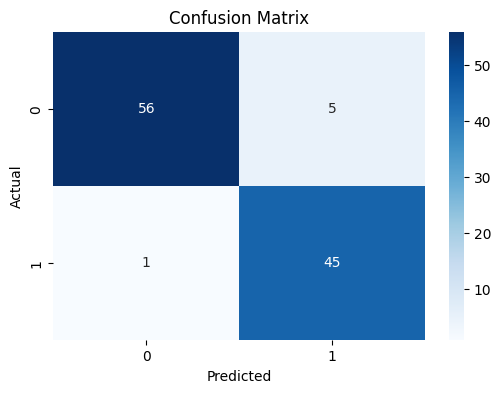

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix

# Load dataset
df = pd.read_csv("anemia.csv")

# Cek data kosong
df.fillna(df.median(), inplace=True)

# Hapus duplikat
df.drop_duplicates(inplace=True)

# Asumsi kolom terakhir adalah target
X = df.iloc[:, :-1]  # Semua kolom kecuali yang terakhir sebagai fitur
y = df.iloc[:, -1]   # Kolom terakhir sebagai target

# Jika ada kolom kategorikal, lakukan encoding
X = pd.get_dummies(X)

# Split dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Prediksi data uji
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [9]:
# Minta input dari pengguna
gender = input("Masukkan Gender (Male/Female): ")
hemoglobin = float(input("Masukkan Hemoglobin: "))
mch = float(input("Masukkan MCH: "))
mchc = float(input("Masukkan MCHC: "))
mcv = float(input("Masukkan MCV: "))

# Masukkan ke dalam dictionary sesuai fitur dataset
data_baru = {
    'Gender': [gender],
    'Hemoglobin': [hemoglobin],
    'MCH': [mch],
    'MCHC': [mchc],
    'MCV': [mcv]
}

# Konversi ke DataFrame
df_baru = pd.DataFrame(data_baru)

# Pastikan encoding sama seperti saat training
df_baru = pd.get_dummies(df_baru)

# Sesuaikan dengan fitur yang dipakai saat training
missing_cols = set(X.columns) - set(df_baru.columns)
for col in missing_cols:
    df_baru[col] = 0  # Tambahkan kolom yang hilang dengan nilai 0

df_baru = df_baru[X.columns]  # Urutkan sesuai dengan fitur training

# Prediksi kelas (0 atau 1)
prediksi = model.predict(df_baru)

print(f"Data baru diklasifikasikan ke kelas: {prediksi[0]}")


Masukkan Gender (Male/Female): 1
Masukkan Hemoglobin: 100
Masukkan MCH: 21
Masukkan MCHC: 56.7
Masukkan MCV: 431
Data baru diklasifikasikan ke kelas: 0
